# Data Science Methodology for Breast Cancer Diagnosis (DSM-BCD)

**Problema.** Colombia presenta limitaciones con respecto al acceso de la detección y el diagnóstico temprano del cáncer, provocado en la mayoría de los casos por factores como el estrato socio-económico, la cobertura del seguro de salud, el origen y la accesibilidad. En promedio, el tiempo de espera de un paciente es de 90 días desde la aparición de los síntomas hasta el diagnóstico de dicho cáncer. La primera acción para reducir la tasa de mortalidad por cáncer de mama debe estar enfocada en la agilidad del diagnóstico y el acceso oportuno a la atención.  Así, el objetivo de esta investigación es aplicar las etapas de la metodología KDD\footnote{Knowledge Discovery in Databases} al conjunto de datos de morbilidad por cáncer entre los años 2019 y 2020 en el municipio de Pereira-Risaralda. Esto con la finalidad de pronosticar y caracterizar el tipo de población mas susceptible de padecer esta enfermedad según su edad, genero, zona y régimen de salud.

**Conjunto de datos.** Un total de 817 muestras de tumores de mama se pedtilaron con cinco plataformas diferentes como se ha descrito previamente (Cancer Genome Atlas Research Network, 2014) y también se pedtilaron 633 casos mediante matriz de proteínas en fase inversa (RPPA)

## Aprendizaje Supervisado


### Multiclass Classification
En el aprendizaje No supervisado, se trabaja con datos sin etiquetar cuya estructura es desconocida. El objetivo será la extracción de información significativa, sin la referencia de variables de salida conocidas, y mediante la exploración de la estructura de dichos datos sin etiquetar

## Desarrollo Multiclass Classification

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
with open('Breast_Clean_Data.csv') as f:
    dataset=pd.read_csv(f, delimiter=',')

In [23]:
dataset.head(10)

,diagnosis_age,metastasis_stage_code,neoplasm_lymph_code,neoplasm_disease_stage_code,tumor_stage_code,cancer_type_detailed,disease_free_months,disease_free_status,er_status_ihc,er_status_ihc_percent_positive,...,disease_surgical_margin_status,primary_tumor_site,tissue_prospective_indicator,pr_status_ihc,race_category,sex,staging_system,surgical_procedure_first,tmb_nonsynonymous,person_neoplasm_status
0,70.0,m0,n0,stage i,t1c,invasive breast carcinoma,8.5,diseasefree,positive,70-79%,...,negative,C50.912,retrospective,negative,white,female,sentinel node biopsy alone,lumpectomy,0.6,tumor free
1,59.0,m0,n0,stage iia,t2,breast invasive ductal carcinoma,14.4,diseasefree,positive,90-99%,...,positive,C50.912,retrospective,positive,white,female,sentinel lymph node biopsy plus axillary disse...,lumpectomy,1.0,tumor free
2,56.0,m0,n0 (i-),stage i,t1c,breast invasive lobular carcinoma,43.4,diseasefree,positive,80-89%,...,negative,C50.412,retrospective,positive,white,female,sentinel lymph node biopsy plus axillary disse...,modified radical mastectomy,0.7,tumor free
3,54.0,m0,n0,stage iia,t2,breast invasive ductal carcinoma,48.1,diseasefree,positive,90-99%,...,negative,C50.912,retrospective,positive,white,female,sentinel lymph node biopsy plus axillary disse...,modified radical mastectomy,1.3,tumor free
4,39.0,m0,n0 (i-),stage iia,t2,breast mixed ductal and lobular carcinoma,47.2,diseasefree,negative,90-99%,...,negative,C50.212,retrospective,positive,white,female,sentinel node biopsy alone,lumpectomy,2.6,tumor free
5,52.0,m0,n1a,stage iib,t2,breast invasive ductal carcinoma,20.9,diseasefree,positive,50-59%,...,negative,C50.911,retrospective,positive,white,female,sentinel lymph node biopsy plus axillary disse...,lumpectomy,5.6,tumor free
6,39.0,m0,n1a,stage iiia,t3,breast invasive ductal carcinoma,13.7,diseasefree,positive,70-79%,...,negative,C50.912,retrospective,positive,black or african american,female,sentinel lymph node biopsy plus axillary disse...,modified radical mastectomy,1.0,tumor free
7,54.0,m0,n0 (i-),stage iia,t2,invasive breast carcinoma,38.6,diseasefree,negative,90-99%,...,positive,C50.411,retrospective,negative,asian,female,sentinel lymph node biopsy plus axillary disse...,lumpectomy,3.4,tumor free
8,77.0,m0,n0 (i-),stage iia,t2,breast invasive ductal carcinoma,8.0,diseasefree,positive,20-29%,...,negative,C50.912,retrospective,negative,white,male,sentinel lymph node biopsy plus axillary disse...,modified radical mastectomy,0.7,tumor free
9,50.0,mx,n1,stage iia,t1c,breast invasive ductal carcinoma,39.3,diseasefree,positive,90-99%,...,negative,C50.912,retrospective,positive,white,female,sentinel lymph node biopsy plus axillary disse...,lumpectomy,1.5,tumor free


In [24]:
dataset.shape

(818, 41)

In [25]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (777, 41)
Unseen Data For Predictions: (41, 41)


In [26]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'oncotree_code', session_id=123) 

,Description,Value
0,session_id,123
1,Target,oncotree_code
2,Target Type,Multiclass
3,Label Encoded,"brca: 0, idc: 1, ilc: 2, mdlc: 3"
4,Original Data,"(777, 41)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9982,0.0000,0.9969,0.9982,0.9981,0.9969,0.9970,0.0040
rf,Random Forest Classifier,0.9982,0.9957,0.9969,0.9982,0.9981,0.9969,0.9970,0.1680
et,Extra Trees Classifier,0.9982,0.9968,0.9969,0.9982,0.9981,0.9969,0.9970,0.1630
lightgbm,Light Gradient Boosting Machine,0.9964,0.9984,0.9961,0.9966,0.9964,0.9940,0.9941,0.0290
gbc,Gradient Boosting Classifier,0.9945,0.9981,0.9953,0.9950,0.9945,0.9910,0.9911,0.1630
dt,Decision Tree Classifier,0.9927,0.9946,0.9945,0.9933,0.9927,0.9880,0.9882,0.0040
lr,Logistic Regression,0.9743,0.9851,0.9559,0.9756,0.9738,0.9569,0.9576,0.1070
lda,Linear Discriminant Analysis,0.9597,0.9785,0.9227,0.9531,0.9533,0.9294,0.9325,0.0070
nb,Naive Bayes,0.8913,0.9907,0.9470,0.9444,0.9010,0.8368,0.8566,0.0040
dummy,Dummy Classifier,0.5820,0.5000,0.2500,0.3387,0.4282,0.0000,0.0000,0.0070


### Decision Tree Classifier

In [28]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9818,0.9783,0.9688,0.9824,0.9814,0.9694,0.9700
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9818,0.9894,0.9922,0.9838,0.9822,0.9702,0.9708
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9815,0.9891,0.9919,0.9835,0.9819,0.9700,0.9706
7,0.9815,0.9891,0.9919,0.9835,0.9819,0.9700,0.9706
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [29]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [30]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9818,0.9783,0.9688,0.9824,0.9814,0.9694,0.9700
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [31]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


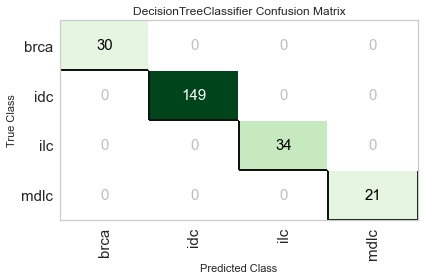

In [32]:
plot_model(tuned_dt, plot = 'confusion_matrix')

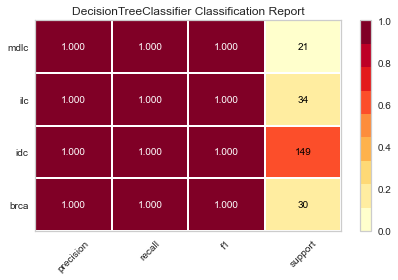

In [33]:
plot_model(tuned_dt, plot = 'class_report')

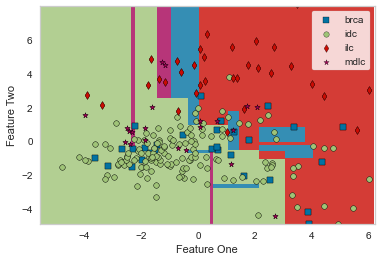

In [34]:
plot_model(tuned_dt, plot='boundary')

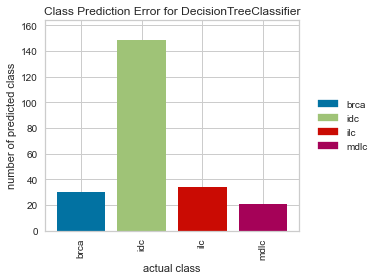

In [35]:
plot_model(tuned_dt, plot = 'error')

In [36]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [37]:
final_dt = finalize_model(tuned_dt)
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [38]:
predict_dt=predict_model(final_dt,data=dataset)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.0000,1.0000,0,0,0,0,0


In [39]:
predict_dt.groupby("Label").describe()

diagnosis_age                                                      \
              count       mean        std   min   25%   50%   75%   max   
Label                                                                     
brca          112.0  59.185714  13.457701  29.0  48.0  59.0  68.0  90.0   
idc           491.0  57.331976  13.315703  26.0  48.0  57.0  66.0  90.0   
ilc           127.0  62.299213  12.760501  38.0  52.5  62.0  73.0  90.0   
mdlc           88.0  61.579545  12.523744  34.0  54.0  62.5  69.0  87.0   

      disease_free_months             ... tmb_nonsynonymous         Score  \
                    count       mean  ...               75%    max  count   
Label                                 ...                                   
brca                112.0  39.169643  ...               1.5   28.7  112.0   
idc                 491.0  38.163136  ...               2.2  128.4  491.0   
ilc                 127.0  41.918110  ...               2.0   35.9  127.0   
mdlc                 88.0  35.559091  ...               1.9    8.0   88.0   

                                                     
           mean       std   min  25%  50%  75%  max  
Label                                                
brca   1.000000  0.000000  1.00  1.0  1.0  1.0  1.0  
idc    0.997963  0.022496  0.75  1.0  1.0  1.0  1.0  
ilc    1.000000  0.000000  1.00  1.0  1.0  1.0  1.0  
mdlc   1.000000  0.000000  1.00  1.0  1.0  1.0  1.0  

[4 rows x 88 columns]

In [40]:
#str_list = ['BRCA','IDC','ILC','MDLC']
#for word in str_list:
    #a=predict_dt[predict_dt['Label']==word]
    #a.to_csv(word + '.csv',index=False)